In [13]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


### 1. Count records in the dataframe

In [14]:
# 0. Cargar los datos de estatura y peso
url = 'http://wiki.stat.ucla.edu/socr/index.php?title=SOCR_Data_Dinov_020108_HeightsWeights&oldid=12529'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]

In [20]:
# Contar registros
num_records = height_weight_df.shape[0]
print(f"Number of records: {num_records}")

Number of records: 200


In [15]:
### 1. Count records in the dataframe
### 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada
### 3. Hallar el intercepto
### 4. Hacer la grafica
### 5. Hallar correlacion y valor p
### 6. Interpretar el valor p

### 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada

### 3. Hallar el intercepto

In [16]:
# Variables explicatoria y explicada
X = height_weight_df[['Height(Inches)']]
y = height_weight_df['Weight(Pounds)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener el intercepto y los coeficientes
intercept = model.intercept_
coef = model.coef_[0]

print(f"Intercepto: {intercept}")
print(f"Coeficiente: {coef}")

Intercepto: -116.49201195912542
Coeficiente: 3.594223380157662


### 4. Hacer la grafica

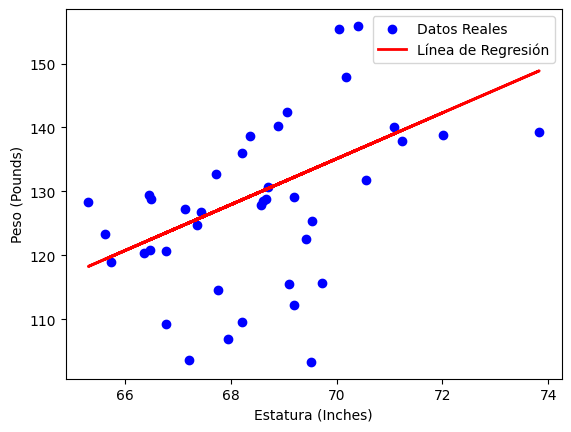

In [17]:
# Predicciones
y_pred = model.predict(X_test)

# Graficar
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Estatura (Inches)')
plt.ylabel('Peso (Pounds)')
plt.legend()
plt.show()

### 5. Hallar correlacion y valor p

In [18]:
# Calcular la correlación de Pearson y el valor p
corr, p_value = pearsonr(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])

print(f"Correlación de Pearson: {corr}")
print(f"Valor p: {p_value}")

Correlación de Pearson: 0.5568647346122995
Valor p: 1.1029015151265877e-17


### 6. Interpretar el valor p

In [19]:
if p_value < 0.05:
    print("La correlación entre estatura y peso es significativa.")
else:
    print("La correlación entre estatura y peso no es significativa.")


La correlación entre estatura y peso es significativa.
